<a href="https://colab.research.google.com/github/tiagodsnt/Real-State-Data-Analysis/blob/main/house_dataframe_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados de imóveis com Pandas

In [23]:
# Importando o Pandas 
import pandas as pd

In [24]:
# Referênciando uma base de dados (upload do arquivo no menu lateral)
arquivo = 'kc_house_data.csv'

In [25]:
# Comando direto do terminal para ler as 5 primeiras linhas do arquivo
# Útil para descobrir qual o separador (sep=',') entre os dados do arquivo
!head -n 5 kc_house_data.csv

"id","date","price","bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"
7129300520,"20141013T000000",221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,"20141209T000000",538000,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
5631500400,"20150225T000000",180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,"20141209T000000",604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000


In [26]:
# Abrindo o arquivo .csv, limitado em 15 linhas 
dataset = pd.read_csv(arquivo, nrows=15)

In [27]:
# Selecionando somento as colunas que irão ser necessárias no projeto, para poupar memória
dataset = pd.read_csv(arquivo, usecols=['id','price','bedrooms','sqft_living'])

In [28]:
# Info sobre o dataset de trabalho
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21613 non-null  int64  
 1   price        21613 non-null  float64
 2   bedrooms     21613 non-null  int64  
 3   sqft_living  21613 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 675.5 KB


# Classificando a 'área de estar' em pequeno, medio e grande (coluna sqft_livin)

In [29]:
# Pegando uma amostra dos 50 primeiros imóveis
#dataset['sqft_living'].head(50)

In [30]:
# Retirando algumas informações da base
dataset['sqft_living'].describe()

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [31]:
# Definindo arbitráriamente o tamanho da área de estar
tamanho_medio = (dataset['sqft_living'].mean())*1.2
tamanho_pequeno = (dataset['sqft_living'].mean())*0.5

In [32]:
# Função Processamento de Dados
def categoriza(s):
  if s > tamanho_medio:
    return 'Big'
  else:
    if s > tamanho_pequeno:
      return 'Medium'
    else:
        return 'Small' 

In [33]:
# Criando nova coluna 'size', que recebe o retorno da função categoriza aplicada a coluna 'sqft_living'
dataset['size'] = dataset['sqft_living'].apply(categoriza)

In [34]:
# Contagem de frequências dos tamanhos na coluna 'size'. Variavel cont recebe as frequências
cont = dataset['size'].value_counts()

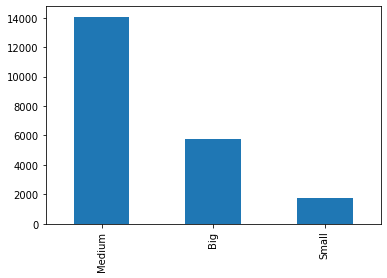

In [35]:
# Plotando gráfico tipo barra
cont.plot.bar()